<a href="https://colab.research.google.com/github/kyounge2/my_ds4bme/blob/master/kyounge2_quiz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quiz 2

**Question 1**
Minimizing $\sum_{i=1}^{n} (Y_i - \beta_1 X_{i1} - \beta_2 X_{i2} - ... - \beta_p X_{ip})^2$, where each $X_{ik}$ of the form $X_{ik} = \mathbb{1}(i \in G_k)$. Argue that the prediction for a person in group $k$ is $\bar{Y}^{(k)}$.

**This question is answered in the image "question1.jpg"**

**Question 2**
Linear regression model to predict the left diencephalon volume from the right (type I level I).

In [0]:
import numpy as np
from scipy import stats as st
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

#load in Kirby 21 data
! if [ ! -e kirby21.csv ]; \
then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv; \
fi;

dt = pd.read_csv("kirby21.csv") 

In [20]:
dt.head()

,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
0,1,kirby127a_3_1_ax.img,Telencephalon_L,531111,0.0,374.0,128.3013,51.8593,1,1,127,1378295,1268519
1,2,kirby127a_3_1_ax.img,Telencephalon_R,543404,0.0,300.0,135.0683,53.6471,1,1,127,1378295,1268519
2,3,kirby127a_3_1_ax.img,Diencephalon_L,9683,15.0,295.0,193.5488,32.2733,1,1,127,1378295,1268519
3,4,kirby127a_3_1_ax.img,Diencephalon_R,9678,10.0,335.0,193.7051,32.7869,1,1,127,1378295,1268519
4,5,kirby127a_3_1_ax.img,Mesencephalon,10268,55.0,307.0,230.8583,29.2249,1,1,127,1378295,1268519


In [0]:
#linear regression model
left = dt.loc[(dt.roi == 'Diencephalon_L')]
right = dt.loc[(dt.roi == 'Diencephalon_R')]

vol_left = np.array(left['volume'])
vol_right = np.array(right['volume'])

#vol_left = dt.query("roi == 'Diencephalon_L' ").volume
#vol_right = dt.query("roi == 'Diencephalon_R' ").volume

#get regression stats
slope, intercept, r, p, std_err = st.linregress(vol_right,vol_left)

In [31]:
##define prediction fucntion
def predict(s,i,x):
  x_pred=np.array(x)
  return s*x_pred+i

vol_left_pred = predict(slope,intercept,vol_right)
err_rate = np.linalg.norm(vol_left - vol_left_pred)**2

print(f'In-sample error rate: {err_rate}')


In-sample error rate: 832740.3005383222


In [32]:
#report other regression coeffs

beta1 = st.pearsonr(vol_right,vol_left)[0]*np.std(vol_left) / np.std(vol_right)
beta0 = np.mean(vol_left) - np.mean(vol_right) * beta1

print(f'Slope (beta0): {beta0}')
print(f'Intercept (beta1): {beta1}')

#these are the same as slope and intercept from the linregress function

Slope (beta0): -694.1809221478507
Intercept (beta1): 1.0675677731655158


Text(0, 0.5, 'Left Diencephalon Volume')

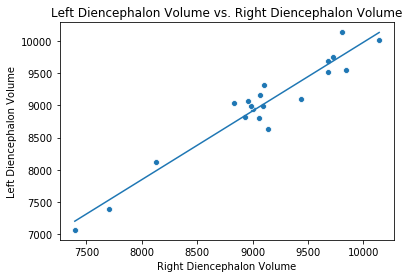

In [37]:
#plot data points
sb.scatterplot(vol_right,vol_left)

#plot predicted
sb.lineplot(vol_right, vol_left_pred)
  
plt.title('Left Diencephalon Volume vs. Right Diencephalon Volume')
plt.xlabel('Right Diencephalon Volume')
plt.ylabel('Left Diencephalon Volume')

**Question 3**

I would propose a product predicting the number of opiod related deaths to the amount of opiod perscipctions issued by state. THis is especially relevant as state legislatures have different means of addressing this epidemi, as misuse and addiction continue to become more prevalent. 